### Without L2 regularization and weight decay

Epoch 1/500 loss: 0.7661 - mae: 0.6128 - val_loss: 0.4226 - val_mae: 0.4492
Epoch 2/500 loss: 0.5084 - mae: 0.5097 - val_loss: 0.3721 - val_mae: 0.4172
Epoch 3/500 loss: 0.4584 - mae: 0.4803 - val_loss: 0.3435 - val_mae: 0.4144
Epoch 4/500 loss: 0.4297 - mae: 0.4648 - val_loss: 0.3843 - val_mae: 0.4231
Epoch 5/500 loss: 0.4053 - mae: 0.4538 - val_loss: 0.3278 - val_mae: 0.3990
Epoch 6/500 loss: 0.3992 - mae: 0.4455 - val_loss: 0.3188 - val_mae: 0.3945
Epoch 7/500 loss: 0.3873 - mae: 0.4378 - val_loss: 0.3385 - val_mae: 0.3992
Epoch 8/500 loss: 0.3763 - mae: 0.4320 - val_loss: 0.3046 - val_mae: 0.3840
Epoch 9/500 loss: 0.3689 - mae: 0.4280 - val_loss: 0.3172 - val_mae: 0.3883
Epoch 10/500 loss: 0.3650 - mae: 0.4240 - val_loss: 0.3081 - val_mae: 0.3870
Epoch 11/500 loss: 0.3572 - mae: 0.4204 - val_loss: 0.3126 - val_mae: 0.3846
Epoch 12/500 loss: 0.3584 - mae: 0.4186 - val_loss: 0.3412 - val_mae: 0.3999
Epoch 13/500 loss: 0.3501 - mae: 0.4161 - val_loss: 0.2987 - val_mae: 0.3848
Epoch 14

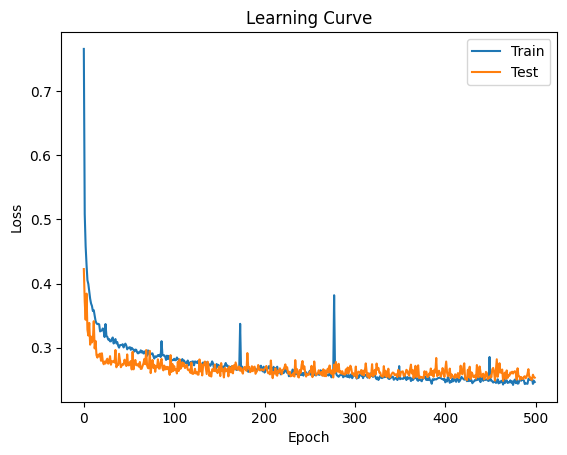

Prediction: 1.40 , true value: 1.37
Prediction: 2.40 , true value: 2.41
Prediction: 1.30 , true value: 2.01
Prediction: 0.77 , true value: 0.73

>>> END <<<


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 500
BATCH_SIZE = 16

# Read and standardize the data.
california_housing = fetch_california_housing()
data = california_housing.get('data')
target = california_housing.get('target')

raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0)

# Convert to same precision as model.
raw_x_train = raw_x_train.astype(np.float32)
raw_x_test = raw_x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

# Create Dataset objects.
trainset = TensorDataset(torch.from_numpy(x_train),
                         torch.from_numpy(y_train))
testset = TensorDataset(torch.from_numpy(x_test),
                        torch.from_numpy(y_test))

# Create model.
model = nn.Sequential(
    nn.Linear(8, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 1)
)

# Initialize weights.
for module in model.modules():
    if isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        nn.init.constant_(module.bias, 0.0)

# Loss function and optimizer
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.MSELoss()

# Train model.
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset,
            optimizer, loss_function, 'mae')

# Print first 4 predictions.
inputs = torch.from_numpy(x_test)
inputs = inputs.to(device)
outputs = model(inputs)
for i in range(0, 4):
    print('Prediction: %4.2f' % outputs.data[i].item(),
         ', true value: %4.2f' % y_test[i].item())

print('\n>>> END <<<')

### With L2 regularization/weight decay

Epoch 1/500 loss: 0.7976 - mae: 0.6156 - val_loss: 0.4530 - val_mae: 0.4610
Epoch 2/500 loss: 0.4879 - mae: 0.4969 - val_loss: 0.3936 - val_mae: 0.4436
Epoch 3/500 loss: 0.4510 - mae: 0.4766 - val_loss: 0.4061 - val_mae: 0.4643
Epoch 4/500 loss: 0.4382 - mae: 0.4721 - val_loss: 0.3813 - val_mae: 0.4425
Epoch 5/500 loss: 0.4326 - mae: 0.4687 - val_loss: 0.3842 - val_mae: 0.4547
Epoch 6/500 loss: 0.4247 - mae: 0.4634 - val_loss: 0.3594 - val_mae: 0.4285
Epoch 7/500 loss: 0.4112 - mae: 0.4549 - val_loss: 0.3575 - val_mae: 0.4265
Epoch 8/500 loss: 0.4099 - mae: 0.4560 - val_loss: 0.3783 - val_mae: 0.4383
Epoch 9/500 loss: 0.4032 - mae: 0.4509 - val_loss: 0.3638 - val_mae: 0.4316
Epoch 10/500 loss: 0.4024 - mae: 0.4509 - val_loss: 0.3768 - val_mae: 0.4290
Epoch 11/500 loss: 0.4003 - mae: 0.4492 - val_loss: 0.3574 - val_mae: 0.4344
Epoch 12/500 loss: 0.3915 - mae: 0.4446 - val_loss: 0.3553 - val_mae: 0.4270
Epoch 13/500 loss: 0.3960 - mae: 0.4475 - val_loss: 0.3471 - val_mae: 0.4217
Epoch 14

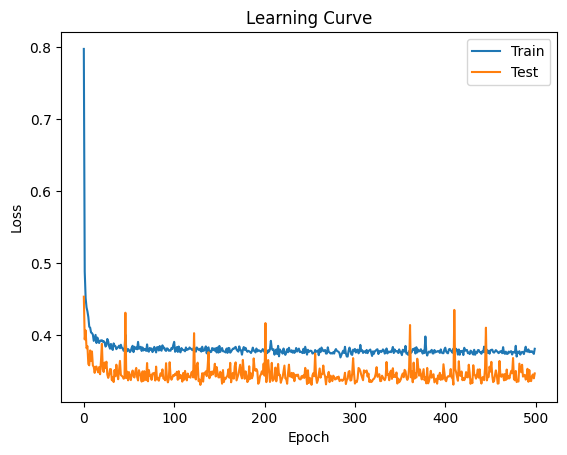

Prediction: 1.68 , true value: 1.37
Prediction: 2.72 , true value: 2.41
Prediction: 1.53 , true value: 2.01
Prediction: 0.86 , true value: 0.73

>>> END <<<


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Fetch and standardize the data.
california_housing = fetch_california_housing()
data = california_housing.get("data")
target = california_housing.get("target")

raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0
)

# Convert to same precision as model.
raw_x_train = raw_x_train.astype(np.float32)
raw_x_test = raw_x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

# Create Dataset objects.
trainset = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
testset = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

# Create model with dropout and L2 regularization.
model = nn.Sequential(
    nn.Linear(8, 64),
    nn.ReLU(),
    nn.Dropout(0.2),  # Dropout layer with 20% drop rate
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.2),  # Dropout layer with 20% drop rate
    nn.Linear(64, 1)
)

# Initialize weights.
for module in model.modules():
    if isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        nn.init.constant_(module.bias, 0.0)

# Loss function and optimizer with L2 regularization (weight decay)
weight_decay = 0.01  # You can tune this parameter
optimizer = torch.optim.Adam(model.parameters(), weight_decay=weight_decay)
loss_function = nn.MSELoss()

# Training function
def train_model(model, device, epochs, batch_size, trainset, testset, optimizer, loss_function, metric):
    train_losses = []
    test_losses = []
    epoch_list = []

    # Transfer model to GPU.
    model.to(device)

    # Create dataloaders.
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    acc = False
    mae = False
    if metric == "acc":
        acc = True
    elif metric == "mae":
        mae = True
    else:
        print("Error: unsupported metric")
        return

    for i in range(epochs):
        model.train()  # Set model in training mode.
        train_loss = 0.0
        if acc:
            train_correct = 0
        if mae:
            train_absolute_error = 0.0
        train_batches = 0
        for inputs, targets in trainloader:
            # Move data to GPU.
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients.
            optimizer.zero_grad()

            # Forward pass.
            outputs = model(inputs)
            loss = loss_function(outputs, targets)

            # Accumulate metrics.
            if acc:
                _, indices = torch.max(outputs.data, 1)
                train_correct += (indices == targets).sum().item()
            if mae:
                train_absolute_error += (targets - outputs.data).abs().sum().item()
            train_batches += 1
            train_loss += loss.item()

            # Backward pass and update.
            loss.backward()
            optimizer.step()

        train_loss = train_loss / train_batches
        train_losses.append(train_loss)
        if acc:
            train_acc = train_correct / (train_batches * batch_size)
        if mae:
            train_mae = train_absolute_error / (train_batches * batch_size)

        # Evaluate the model on the test dataset.
        model.eval()  # Set model in inference mode.
        test_loss = 0.0
        if acc:
            test_correct = 0
        if mae:
            test_absolute_error = 0.0
        test_batches = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            if acc:
                _, indices = torch.max(outputs.data, 1)
                test_correct += (indices == targets).sum().item()
            if mae:
                test_absolute_error += (targets - outputs.data).abs().sum().item()
            test_batches += 1
            test_loss += loss.item()
        test_loss = test_loss / test_batches
        test_losses.append(test_loss)
        if acc:
            test_acc = test_correct / (test_batches * batch_size)
            print(f"Epoch {i+1}/{epochs} loss: {train_loss:.4f} - acc: {train_acc:0.4f} - val_loss: {test_loss:.4f} - val_acc: {test_acc:0.4f}")
            return_value = [train_acc, test_acc]
        if mae:
            test_mae = test_absolute_error / (test_batches * batch_size)
            print(f"Epoch {i+1}/{epochs} loss: {train_loss:.4f} - mae: {train_mae:0.4f} - val_loss: {test_loss:.4f} - val_mae: {test_mae:0.4f}")
            return_value = [train_mae, test_mae]

        epoch_list.append(i)
    plt.plot(epoch_list, train_losses)
    plt.plot(epoch_list, test_losses)
    plt.title("Learning Curve")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc="upper right")
    plt.show()
    return return_value

# Parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 500
BATCH_SIZE = 16

# Train model.
train_model(
    model,
    device,
    EPOCHS,
    BATCH_SIZE,
    trainset,
    testset,
    optimizer,
    loss_function,
    "mae",
)

# Print first 4 predictions.
inputs = torch.from_numpy(x_test)
inputs = inputs.to(device)
outputs = model(inputs)
for i in range(0, 4):
    print("Prediction: %4.2f" % outputs.data[i].item(), ", true value: %4.2f" % y_test[i].item())

print("\n>>> END <<<")


# Weight decay = 0.01 and the batch size is 64

Epoch 1/500 loss: 1.2015 - mae: 0.7453 - val_loss: 0.5170 - val_mae: 0.4954
Epoch 2/500 loss: 0.5774 - mae: 0.5444 - val_loss: 0.4736 - val_mae: 0.4580
Epoch 3/500 loss: 0.5313 - mae: 0.5116 - val_loss: 0.4271 - val_mae: 0.4549
Epoch 4/500 loss: 0.4940 - mae: 0.4970 - val_loss: 0.3897 - val_mae: 0.4341
Epoch 5/500 loss: 0.4692 - mae: 0.4870 - val_loss: 0.3926 - val_mae: 0.4379
Epoch 6/500 loss: 0.4568 - mae: 0.4793 - val_loss: 0.3882 - val_mae: 0.4310
Epoch 7/500 loss: 0.4489 - mae: 0.4752 - val_loss: 0.3797 - val_mae: 0.4270
Epoch 8/500 loss: 0.4398 - mae: 0.4711 - val_loss: 0.3733 - val_mae: 0.4220
Epoch 9/500 loss: 0.4335 - mae: 0.4660 - val_loss: 0.3725 - val_mae: 0.4335
Epoch 10/500 loss: 0.4288 - mae: 0.4644 - val_loss: 0.3698 - val_mae: 0.4193
Epoch 11/500 loss: 0.4218 - mae: 0.4599 - val_loss: 0.3663 - val_mae: 0.4242
Epoch 12/500 loss: 0.4116 - mae: 0.4545 - val_loss: 0.3539 - val_mae: 0.4143
Epoch 13/500 loss: 0.4082 - mae: 0.4535 - val_loss: 0.3556 - val_mae: 0.4173
Epoch 14

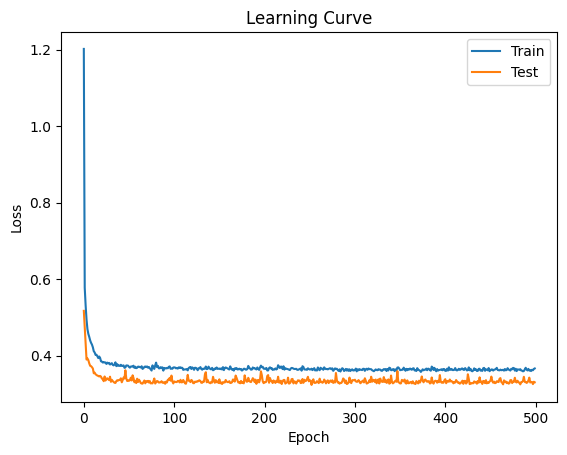

Prediction: 1.63 , true value: 1.37
Prediction: 2.73 , true value: 2.41
Prediction: 1.40 , true value: 2.01
Prediction: 0.83 , true value: 0.73

>>> END <<<


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Fetch and standardize the data.
california_housing = fetch_california_housing()
data = california_housing.get("data")
target = california_housing.get("target")

raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0
)

# Convert to same precision as model.
raw_x_train = raw_x_train.astype(np.float32)
raw_x_test = raw_x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

# Create Dataset objects.
trainset = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
testset = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

# Create model with dropout and L2 regularization.
model = nn.Sequential(
    nn.Linear(8, 64),
    nn.ReLU(),
    nn.Dropout(0.2),  # Dropout layer with 20% drop rate
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(0.2),  # Dropout layer with 20% drop rate
    nn.Linear(64, 1)
)

# Initialize weights.
for module in model.modules():
    if isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        nn.init.constant_(module.bias, 0.0)

# Loss function and optimizer with L2 regularization (weight decay)
weight_decay = 0.01  # You can tune this parameter
optimizer = torch.optim.Adam(model.parameters(), weight_decay=weight_decay)
loss_function = nn.MSELoss()

# Training function
def train_model(model, device, epochs, batch_size, trainset, testset, optimizer, loss_function, metric):
    train_losses = []
    test_losses = []
    epoch_list = []

    # Transfer model to GPU.
    model.to(device)

    # Create dataloaders.
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    acc = False
    mae = False
    if metric == "acc":
        acc = True
    elif metric == "mae":
        mae = True
    else:
        print("Error: unsupported metric")
        return

    for i in range(epochs):
        model.train()  # Set model in training mode.
        train_loss = 0.0
        if acc:
            train_correct = 0
        if mae:
            train_absolute_error = 0.0
        train_batches = 0
        for inputs, targets in trainloader:
            # Move data to GPU.
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients.
            optimizer.zero_grad()

            # Forward pass.
            outputs = model(inputs)
            loss = loss_function(outputs, targets)

            # Accumulate metrics.
            if acc:
                _, indices = torch.max(outputs.data, 1)
                train_correct += (indices == targets).sum().item()
            if mae:
                train_absolute_error += (targets - outputs.data).abs().sum().item()
            train_batches += 1
            train_loss += loss.item()

            # Backward pass and update.
            loss.backward()
            optimizer.step()

        train_loss = train_loss / train_batches
        train_losses.append(train_loss)
        if acc:
            train_acc = train_correct / (train_batches * batch_size)
        if mae:
            train_mae = train_absolute_error / (train_batches * batch_size)

        # Evaluate the model on the test dataset.
        model.eval()  # Set model in inference mode.
        test_loss = 0.0
        if acc:
            test_correct = 0
        if mae:
            test_absolute_error = 0.0
        test_batches = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            if acc:
                _, indices = torch.max(outputs.data, 1)
                test_correct += (indices == targets).sum().item()
            if mae:
                test_absolute_error += (targets - outputs.data).abs().sum().item()
            test_batches += 1
            test_loss += loss.item()
        test_loss = test_loss / test_batches
        test_losses.append(test_loss)
        if acc:
            test_acc = test_correct / (test_batches * batch_size)
            print(f"Epoch {i+1}/{epochs} loss: {train_loss:.4f} - acc: {train_acc:0.4f} - val_loss: {test_loss:.4f} - val_acc: {test_acc:0.4f}")
            return_value = [train_acc, test_acc]
        if mae:
            test_mae = test_absolute_error / (test_batches * batch_size)
            print(f"Epoch {i+1}/{epochs} loss: {train_loss:.4f} - mae: {train_mae:0.4f} - val_loss: {test_loss:.4f} - val_mae: {test_mae:0.4f}")
            return_value = [train_mae, test_mae]

        epoch_list.append(i)
    plt.plot(epoch_list, train_losses)
    plt.plot(epoch_list, test_losses)
    plt.title("Learning Curve")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc="upper right")
    plt.show()
    return return_value

# Parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 500
BATCH_SIZE = 64

# Train model.
train_model(
    model,
    device,
    EPOCHS,
    BATCH_SIZE,
    trainset,
    testset,
    optimizer,
    loss_function,
    "mae",
)

# Print first 4 predictions.
inputs = torch.from_numpy(x_test)
inputs = inputs.to(device)
outputs = model(inputs)
for i in range(0, 4):
    print("Prediction: %4.2f" % outputs.data[i].item(), ", true value: %4.2f" % y_test[i].item())

print("\n>>> END <<<")


### Observation:

L2 regularization/weight decay is one way where we can avoid overfitting of the model. It is a regularization term added to the loss function of the neural network during training to penalize large weights.This works efficiently with SGD. To simply put it, to balance out the loss function and the penalty, we add some hyperparameter which is lambda. So in case of L2 norm, we add the swuare of the weights to the loss and do the gradient descent.

regularized_loss = loss + lambda . penalty

using the l2 regularization,

regularized_loss = loss + lambda * (weight) ^ 2

Comparing both the codes, the first one which is without generalization has slight fluctuations in the learning process. While in the second code, where the weight decay is 0.01, gives us a fluctuations but the prediction and true values are close enough.

Optimal value, it is not really necessary as it did not make much difference in the true value and the predicted value. I guess, It also depends on the problem we are working on.